# Numerical computation of stability limits

In the following, we will consider the nuerical stability of a linear discrete advecton-diffusion equation. The stability will be analysed through the procedure that we have discussed in the lecture 10, while the specific example has not been discussed in the lecture, where diffusion and advection equations have been considered separately.

The equation that we consider is 
$$ \frac{\partial \phi}{\partial t} = -v\frac{\partial \phi}{\partial x} + \nu\frac{\partial^2 \phi}{\partial x^2} \,,$$
where $\phi$ is the solution variable, $v$ is a positive convection velocity and $\nu$ a diffusion coefficient. Like in most of our examples, $t$ represents time and $x$ the spatial variable.The spatial domain of the solution is $x \in [0, L]$, while the temporal domain is $t \in [0, \infty)$. Before discretising the spatial domain, we give the constants $v$ and $\nu$ some values.



 


In [1]:
# Some preliminary operations: let's import useful modules that we will use later on

import numpy as np                          # module for matrix operations
from matplotlib import pyplot as plt        # module for plotting, the decorator in the following line makes the plots
                                            # appear directly into the notebook instead of an external window
%matplotlib notebook
import scipy.linalg       as lin            # module for linear algebra (we will use it for computing eigenvalues)

In [2]:
v  = 15
nu = 0.1

The spatial domain, described by the infinite (continuous) set $\mathcal{R}$ of real number $x \in [0, L]$, has to be discretised into $N$ discrete points equidistantly spaced over the range $[0, L]$. As explained in the lecture 10, we can  exclude this time the boundary points $x_0=0$ and $x_{N+1}=L$ from the array $\mathbf{\phi}$ of the unknowns, since these will be determined from the boundary conditions. In this way, we have exactly $N$ points between $x_1=\Delta x$ and $x_N=L-\Delta x$. The spatial discretisation is thus achieved in Python as follows



In [3]:
# Define the discretised domain

L = 1.0       # Length of the domain [0:L]
N = 90       # Number of nodes where we place unknowns, i.e. excluding the boundaries
dx = L/(N+1)  # Grid spacing ( from i=0 i=N+1 we have N+2 nodes, thus N+1 intervals dx)
 
x = np.linspace(dx, L-dx, num=N)  # The domain 

We now indicate the discrete $i$-th point of the domain as 

$$x_i = i \frac{L}{N+1} = i \Delta x \qquad \text{with}  \qquad i = 1,2,.\!.\!.,N $$

We can also order all the points $x_i$ into a column vector 

$$\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
... \\
x_{i-1} \\
x_{i} \\
x_{i+1} \\
... \\
x_{N}
\end{pmatrix}$$

We derive the quasi-discrete form of the equation above, for instance, by discretising the spatial operators with central finite differences of second order for both the convective and the diffusive term. This yields to the following semi-discrete equation

$$ \frac{\mathrm{d} \phi_i}{\mathrm{d} t} = -\frac{v}{\Delta x}\left( \phi_{i+1} - \phi_{i-1} \right) + 
   \frac{\nu}{\Delta x^2}\left( \phi_{i+1} - 2\phi_{i} +\phi_{i-1} \right) $$
   
Once the domain $x$ is discretised into discrete points $x_i$, our function $\phi$ can also be discretised into discrete values 

$$\phi_i = \phi(x_i) \, ,$$

which can be also collected into the array 

$$\mathbf{\phi} = \begin{pmatrix}
\phi_1 \\
\phi_2 \\
... \\
\phi_{i-1} \\
\phi_{i} \\
\phi_{i+1} \\
... \\
\phi_{N}
\end{pmatrix}$$
   
If we want to study the stability of the discretised equation above, as we did in lecture 10, we have to recast it into the matrix-vector form

$$ \frac{\mathrm{d} \mathbf{\phi}}{\mathrm{d} t} = \mathsf{S} \mathbf{\phi} + \mathbf{Q}$$
   
where $\mathsf{S}$ is the matrix of the spatial finite-difference coefficients and $\mathbf{Q}$ is the vector containing the boundary values. Please recall that only the matrix $\mathsf{S}$ does influence the eigenvalue and eigenvectors of the spatial operators, while the vector $\mathbf{Q}$ will not, so we can ignore it in the following. The matrix $\mathsf{S}$ is easily derived from our discretisation as follows

In [4]:
S =  (nu*(np.diag( 1*np.ones(N-1),k=-1)/dx**2 +
          np.diag( 1*np.ones(N-1),k= 1)/dx**2 +
          np.diag(-2*np.ones(N  ),k= 0)/dx**2)+ 
      -v*(np.diag( 1*np.ones(N-1),k= 1)/(2*dx)+
          np.diag(-1*np.ones(N-1),k=-1)/(2*dx)))

#Uncomment this to impose periodic boundary condition 
#S[0,-1]=nu/dx**2-v/(2*dx)
#S[-1,0]=nu/dx**2-v/(2*dx)

This is a tridiagonal matrix (try to inspect its structure like we did in the previous notebook), where the first and last rows describe the discrete equation at the first point next to the boundaries of the computational domain. Therefore this rows are missing a coefficient, the one multiplying the boundary value itself, which is not included in the solution vector $\mathbf{\phi}$. If we assume Dirichlet boundary conditions $\phi_0 = \phi_L$ and $\phi_{N+1}=\phi_R$, the prescribed (and thus known) boundary $\phi$-values are included in the vector $\mathbf{Q}$ and not present in the matrix $\mathsf{S}$. Other kind of boundary condition, such as Neumann or periodic boundary condition, do result in modification of the coefficients of the matrix $\mathsf{S}$. In case of periodic boundary condition $\mathsf{S}$ shuold be modified as follows

$$\mathsf{S}[0, N-1] =  -\nu/\Delta x^2 + v / (2\Delta x)$$
$$\mathsf{S}[N-1, 0] =  -\nu/\Delta x^2 - v / (2\Delta x)$$

The spectrum of the spatial operator is easily computed by the eigenvalue decomposition of the matrix $\mathsf{S}$. In Python, this is super easily computed as follows

In [5]:
omega, R = lin.eig(S)

Here, $\textsf{omega}$ is the vector of eigenvalues and $\textsf{R}$ is the matrix, whose columns are the right eigenvectors. 

For assessing the stability, we just need to chose a temporal integration scheme. In this example we choose explicit Euler, for instance. From the lecture, we know that the neutral stability curve of explicit Euler is as follows

In [6]:
dt = 0.0005                               # Choose a timestep
theta = np.linspace(-np.pi, np.pi, 100)  # Vector of the reduced wavenumbers (arbitarily discretised in 100 steps,
                                         #                                    we will plot it as continuous)
omega_lim = (np.exp(1j*theta)-1)         # Definition of the limit to the eigenvalues for Euler explicit


Now we just have to compare the spectrum of the spatial operator with the neutral stability curve of the chosen temporal scheme, which we will do in the following

<IPython.core.display.Javascript object>


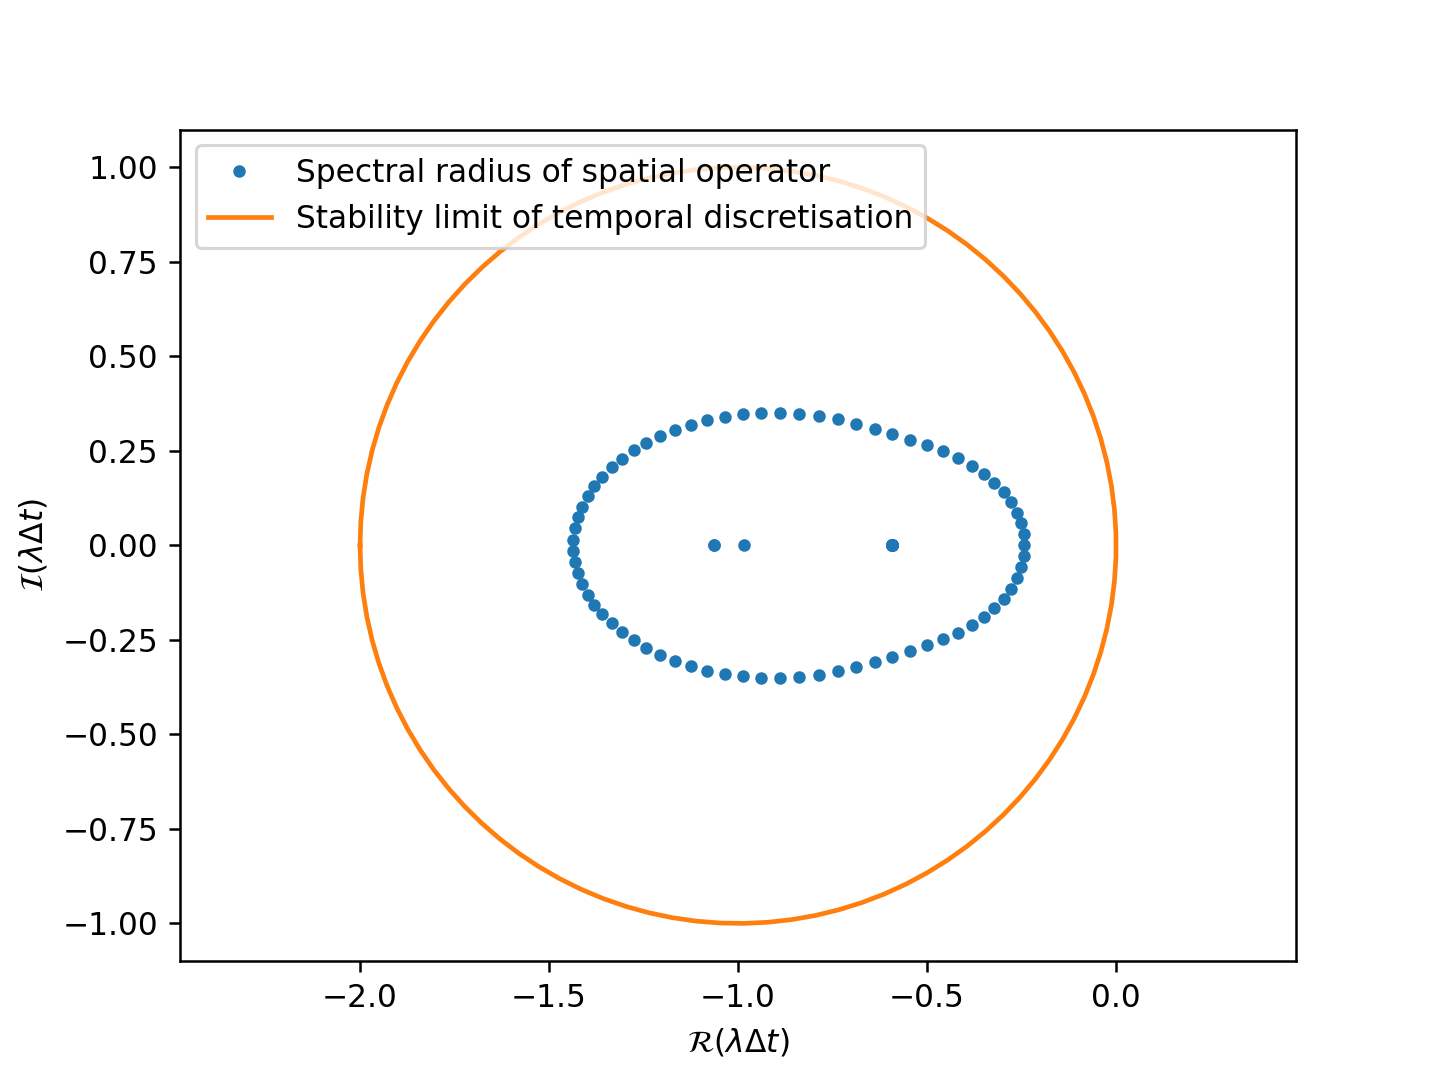

In [7]:
# Create a figure environment
plt.figure()

# Plot the spectrum of the spatial operator
# (I multiply it by dt, since we plot the eigenvalues on the lambda*dt axes)
plt.plot(np.real(omega)*dt,np.imag(omega)*dt,'.',label='Spectral radius of spatial operator')

# Plot the neutral-stability curve of the temporal scheme
#
plt.plot(np.real(omega_lim), np.imag(omega_lim),label='Stability limit of temporal discretisation')

# Set axis label
#plt.xlim([-4,2])
#plt.ylim([-2,2])
plt.xlabel(r'$\mathcal{R}(\lambda \Delta t)$')
plt.ylabel(r'$\mathcal{I}(\lambda \Delta t)$')
plt.legend()
plt.gca().axis('equal')
plt.show()

This figures shows us two main conclusions:

1) The method is stable for the present choice of discretisation parameters $\Delta x$ and $\Delta t$ and for the present values of $v$ and $\nu$. In fact, the spectrum of the spatial operator resides within the unit circle centered at -1, which represents the stable region of the Euler explicit temporal integration scheme.

2) The spectrum of the spatial operator for Dirichlet boundary condition has a different form than the one for periodic boundary conditions, confirming that boundary condition can influence stability.

If you are interested, try to change the spatial and temporal discretisation and the discretisation parameters and see how these choices influence stability.
